# CreditCard Fraud Detection
# Shubham kumar (32) and Pratik Shukla(49)
# DMA project


Observations about dataset:

    The data set is highly skewed, consisting of 492 frauds in a total of 284,807 observations. This resulted in only 0.172% fraud cases. This skewed set is justified by the low number of fraudulent transactions.

    The dataset consists of numerical values from the 28 ‘Principal Component Analysis (PCA)’ transformed features, namely V1 to V28.

    The ‘Time’ and ‘Amount’ features are not transformed data.

    There is no missing value in the dataset.



In [17]:
import pandas as pd                        #for data handling
import numpy as np                      #for dat manipulation
import matplotlib.pyplot as plt           #for plotih graph
import seaborn as sns                        
%matplotlib inline 
from sklearn.tree import DecisionTreeClassifier  #for decison tree and random forest
from sklearn.preprocessing import StandardScaler
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

In [18]:
df=pd.read_csv("/home/shubham/Desktop/DMA/creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [19]:
print(df.columns)

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

# Exploratory Data Analysis

In [21]:
df.shape

(284807, 31)

In [22]:
print(df.columns)

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')


In [23]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


Checking if any null value

In [24]:
df.isnull().values.any()
# There is  no null value in this dataset

False

In [25]:
df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


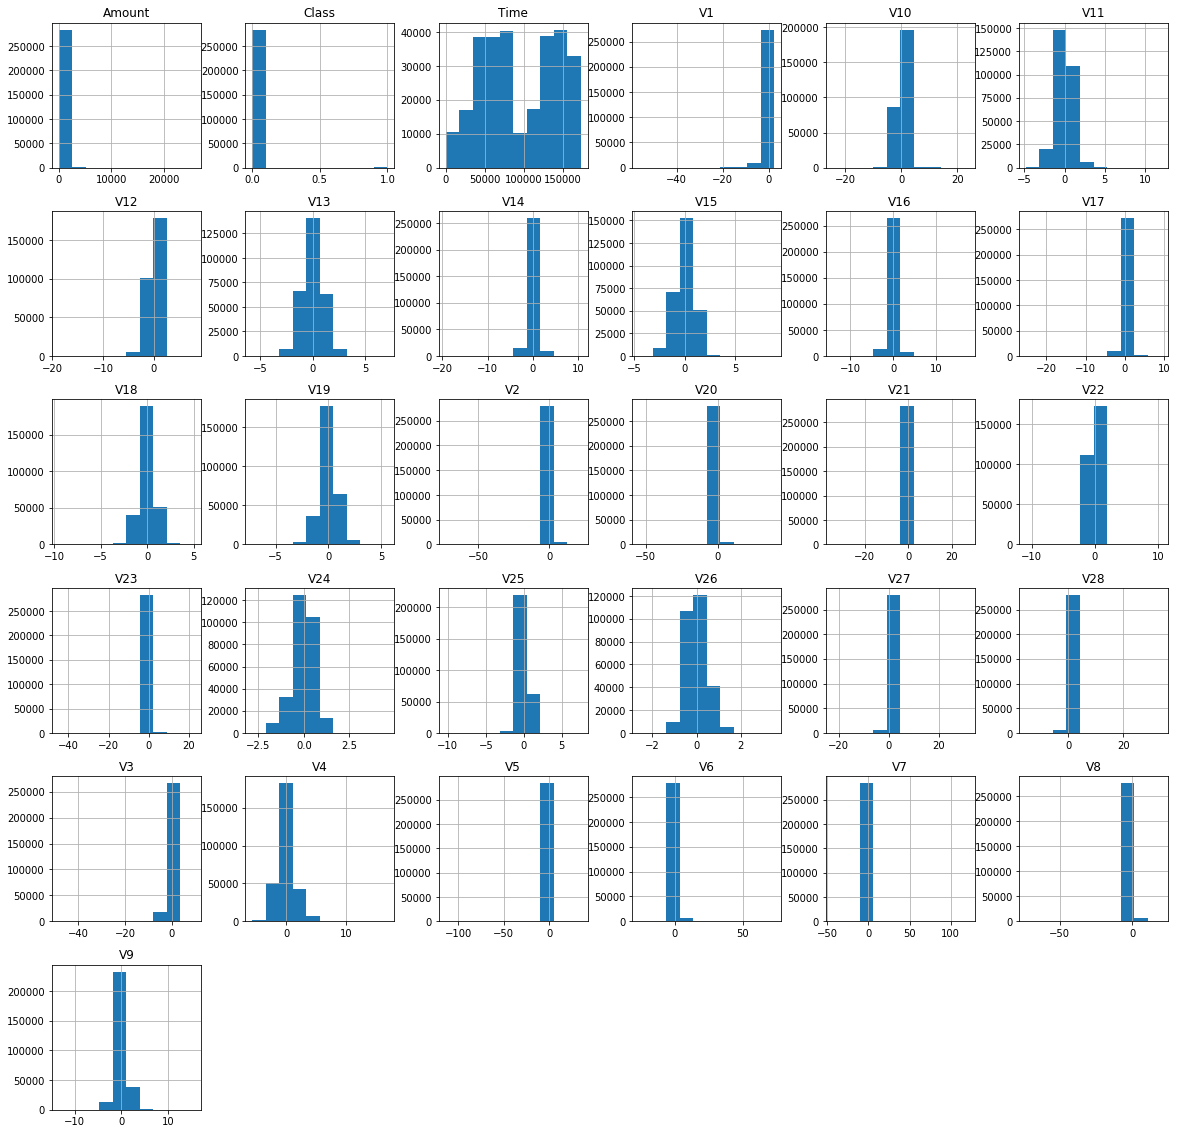

In [26]:
# Plot histograms of each parameter 
df.hist(figsize = (20, 20))
plt.show()

Finding correlation betwenn class and other variables

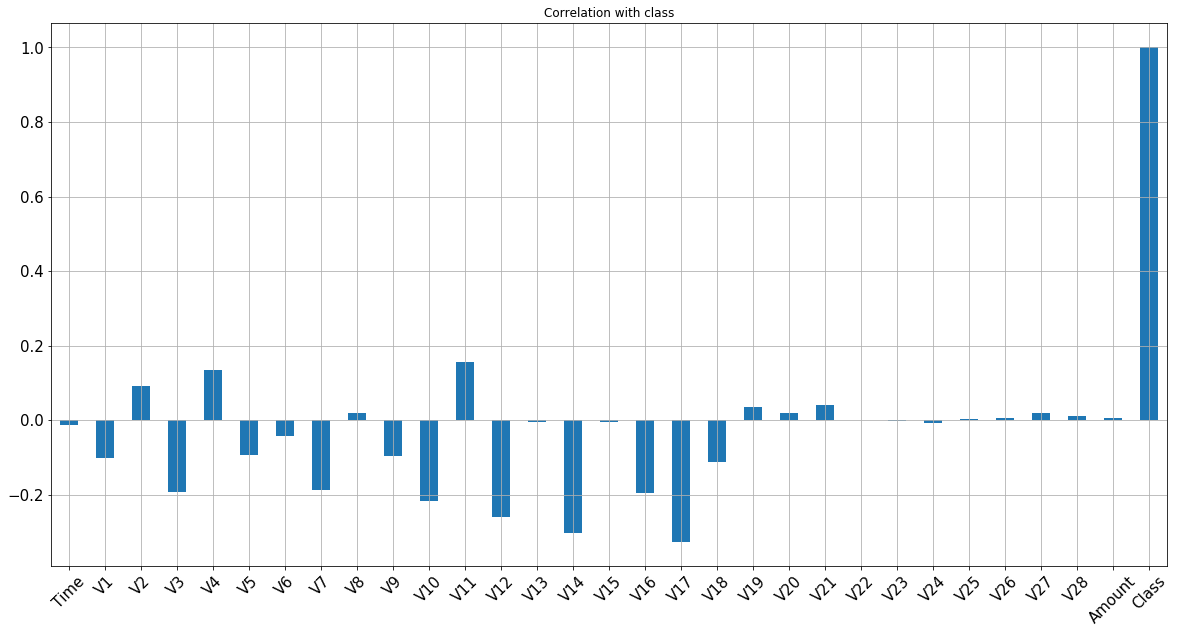

In [27]:
df.corrwith(df.Class).plot.bar(
        figsize = (20, 10), title = "Correlation with class", fontsize = 15,
        rot = 45, grid = True)

It shows that V2, V4 and V11 are the most correlated with Class whereas
V17 is the least correlated as it has a negative correlation.

Finding correlation using heatmap

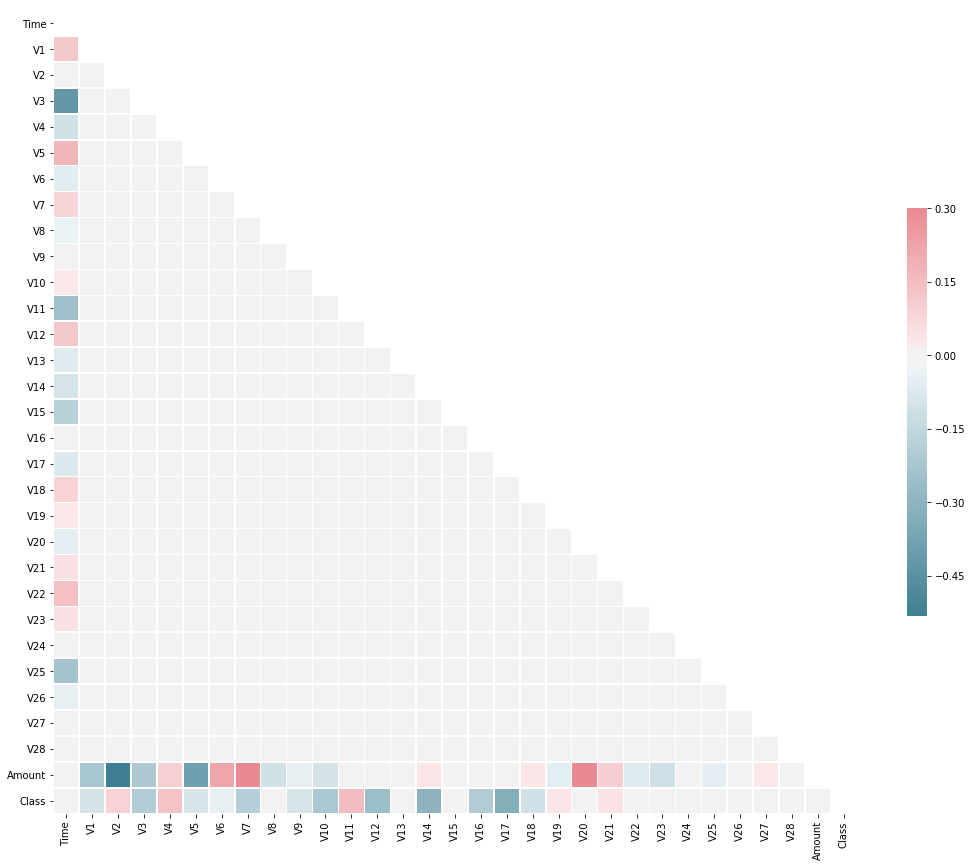

In [28]:
corr = df.corr()
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(18, 15))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [29]:
# Determine number of fraud cases  and its percentage in dataset

Fraud = df[df['Class'] == 1]
Valid = df[df['Class'] == 0]

outlier_fraction = len(Fraud)/float(len(Valid))
print(outlier_fraction)

print('Fraud Cases: {}'.format(len(df[df['Class'] == 1])))
print('Valid Transactions: {}'.format(len(df[df['Class'] == 0])))

0.0017304750013189597
Fraud Cases: 492
Valid Transactions: 284315


# Feature Selection

In [30]:
df['normalizedAmount'] = StandardScaler().fit_transform(df['Amount'].values.reshape(-1,1))
df = df.drop(['Amount'],axis=1)
df = df.drop(['Time'],axis=1)

print("Amount column has been normalised under the name of NormalizedAmount")
print("Time column has been dropped")
df.head()

Amount column has been normalised under the name of NormalizedAmount
Time column has been dropped


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,normalizedAmount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403


In [31]:
#important packages to install

from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score, roc_curve, auc, precision_recall_curve
X = df.iloc[:, df.columns != 'Class']
y = df.iloc[:, df.columns == 'Class']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state=0)

# Training model in Decision Tree

In [32]:
%%time
classifier = DecisionTreeClassifier(random_state = 11,
                                    criterion = 'gini',  splitter='best', min_samples_leaf=1, min_samples_split=2)
classifier.fit(X_train, y_train)

CPU times: user 22.1 s, sys: 28.1 ms, total: 22.1 s
Wall time: 22.1 s


In [33]:
# Predictions
classifier = DecisionTreeClassifier(random_state = 11,
                                    criterion = 'gini',  splitter='best', min_samples_leaf=1, min_samples_split=2)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
y_pred_prob = classifier.predict_proba(X_test)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Decision Tree Predicion on Test Set:")
print("------------------------------------")
print("Accuracy:\t%.4f" % (acc))
print("Precision:\t%.4f" % (prec))
print("Recall:\t\t%.4f" % (rec))
print("F1 Score:\t%.4f" % (f1))

result_dict = {
    'Model': 'Decision Tree',
    'Accuracy': acc,
    'Precision': prec,
    'Recall': rec,
    'F1 Score': f1
}

try:
    results = results.append(result_dict, ignore_index=True)
except NameError:
    results = pd.DataFrame([['Decision Tree', acc, prec, rec, f1, 0]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score',])

Decision Tree Predicion on Test Set:
------------------------------------
Accuracy:	0.9992
Precision:	0.7817
Recall:		0.7551
F1 Score:	0.7682


AssertionError: 5 columns passed, passed data had 6 columns

# Recall is the ratio of the detected positives from all the available or true positives

# Precision is the ratio of the true positives out of the predicted ones


If precision is equal 0.72 and recall is 0.76 it means that a model can detect 76% of the fraud transactions and when it claims that a transaction is fraud, it is correct only 72% of the times.
One would like both to be high, unfortunately when precision increases, recall decreases. So a compromise needs to be done for each specific application.

In the case of credit card fraud detection, a high recall is desirable in order to detect all fraud transactions but that means that the precision is low hence many genuine transactions will be flagged as fraud.

# Confusion Matrix

In [ ]:
cm    = confusion_matrix(y_test, y_pred) # rows = truth, cols = prediction
df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))

sns.heatmap(df_cm, annot=True, fmt='g')



The confusion matrix contains 4 sections with rows representing the true values and columns representing the predicted values.

    True Negatives (Top left): Number of samples that are not fraud which the model correctly predicted as not fraud
    True Positives (Bottom right): Number of samples that are fraud which the model correctly predicted as fraud
    False Negatives (Bottom Left): Number of samples that are fraud which the model predicted as not fraud i.e. this is the number of transactions that were able to fool the model
    False Positives (Top right): Number of samples that are not fraud which the model predicted as fraud i.e. this is the number of transactions that the model mistankenly tried to stop



# Training model in RandomForest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(random_state=0,
                                       max_depth=12,
                                       n_estimators=250,
                                       max_leaf_nodes=100,
                                       n_jobs=-1)
random_forest.fit(X_train, np.ravel(y_train))


In [ ]:
# Predicting Test Set
y_pred      = random_forest.predict(X_test)
y_pred_prob = random_forest.predict_proba(X_test)

accuracy  = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall    = recall_score(y_test, y_pred)
f1        = f1_score(y_test, y_pred)

print("Random Forest Predicion on Test Set:")
print("------------------------------------")
print("Accuracy:\t%.4f" % (accuracy))
print("Precision:\t%.4f" % (precision))
print("Recall:\t\t%.4f" % (recall))
print("F1 Score:\t%.4f" % (f1))

result_dict = {
    'Model': 'Random Forest',
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1 Score': f1
}

try:
    results = results.append(result_dict, ignore_index=True)
except NameError:
    results = pd.DataFrame([['Random Forest', accuracy, precision, recall, f1, 0]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score',])

# Confusion Matrix for random forest

In [ ]:
cm    = confusion_matrix(y_test, y_pred) # rows = truth, cols = prediction
df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))

sns.heatmap(df_cm, annot=True, fmt='g')

# Neural network model

In [ ]:
# Create model
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Activation
from tensorflow.keras.optimizers import Adam
nn_model = Sequential()

nn_model.add(Dense(16, input_dim = X_train.shape[1]))
nn_model.add(BatchNormalization())
nn_model.add(Activation('relu'))
nn_model.add(Dense(12))
nn_model.add(BatchNormalization())
nn_model.add(Activation('relu'))
nn_model.add(Dense(1, activation = 'sigmoid'))

nn_model.compile(optimizer=Adam(lr=1e-3) , loss='binary_crossentropy')
                 # Model Summary
nn_model.summary()

In [ ]:
%%time
epochs=20
batch_size=512
h = nn_model.fit(X_train, y_train,
                 batch_size=batch_size,
                 epochs=epochs)

In [ ]:
y_pred_prob = nn_model.predict(X_test)
y_pred      = (y_pred_prob > 0.5)

accuracy  = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall    = recall_score(y_test, y_pred)
f1        = f1_score(y_test, y_pred)

print("Neural Network Predicion on Test Set:")
print("-------------------------------------")
print("Accuracy:\t%.4f" % (accuracy))
print("Precision:\t%.4f" % (precision))
print("Recall:\t\t%.4f" % (recall))
print("F1 Score:\t%.4f" % (f1))

result_dict = {
    'Model': 'Keras NN',
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1 Score': f1
}

try:
    results = results.append(result_dict, ignore_index=True)
except NameError:
    results = pd.DataFrame([[' Neural Networks', accuracy, precision, recall, f1, 0]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score',])

we got predections using different models

In [ ]:
print(results)

# Conclusion:
    Credit card fraud has become more and more rampant in recent years.
    To improve merchants risk managements level in an automatic and effective way, building an accurate and
    easy handling credit card risk monitering system in one of the key tasks for the merchant bank